<a href="https://colab.research.google.com/github/mia1996/r-rlcard_test/blob/master/Blackjack_mutiple_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Running Multiple Processes on Blackjack**
The environments can be run with multiple processes to accelerate the training. Below is an example to train DQN on Blackjack with multiple processes.The example is shown below:

Note that we must use if `__name__ == '__main__' `for multiprocessing.


In [0]:
pip install rlcard

In [0]:
pip install rlcard[tensorflow]

In [0]:
import tensorflow as tf
import os

import rlcard
from rlcard.agents import DQNAgent
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [0]:
def main():
    # Make environment
    env = rlcard.make('blackjack', config={'seed': 0, 'env_num': 4})
    eval_env = rlcard.make('blackjack', config={'seed': 0, 'env_num': 4})

    # Set the iterations numbers and how frequently we evaluate performance
    evaluate_every = 100
    evaluate_num = 10000
    iteration_num = 5000

    # The intial memory size
    memory_init_size = 100

    # Train the agent every X steps
    train_every = 1

    # The paths for saving the logs and learning curves
    log_dir = './experiments/blackjack_dqn_result/'

    # Set a global seed
    set_global_seed(0)

    with tf.Session() as sess:

        # Initialize a global step
        global_step = tf.Variable(0, name='global_step', trainable=False)

        # Set up the agents
        agent = DQNAgent(sess,
                         scope='dqn',
                         action_num=env.action_num,
                         replay_memory_init_size=memory_init_size,
                         train_every=train_every,
                         state_shape=env.state_shape,
                         mlp_layers=[10,10])
        env.set_agents([agent])
        eval_env.set_agents([agent])

        # Initialize global variables
        sess.run(tf.global_variables_initializer())

        # Initialize a Logger to plot the learning curve
        logger = Logger(log_dir)

        for iteration in range(iteration_num):

            # Generate data from the environment
            trajectories, _ = env.run(is_training=True)

            # Feed transitions into agent memory, and train the agent
            for ts in trajectories[0]:
                agent.feed(ts)

            # Evaluate the performance. Play with random agents.
            if iteration % evaluate_every == 0:
                logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])
        
        # Save model
        save_dir = 'models/blackjack_dqn'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        saver = tf.train.Saver()
        saver.save(sess, os.path.join(save_dir, 'model'))




Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.





Instructions for updating:
Please switch to tf.train.get_global_step

----------------------------------------
  timestep     |  4
  reward       |  -0.7399
----------------------------------------
INFO - Agent dqn, step 100, rl-loss: 1.0956813097000122WARNING:tensorflow

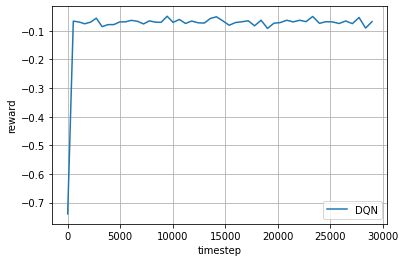

In [0]:
if __name__ == '__main__':
    main()